In [62]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
%matplotlib inline

In [63]:
def med_med (x):
    temp = x
    return (np.median(np.abs(temp-np.median(temp))))

def med_med_weight (x,weight):
    temp = x
    w = weight/np.sum(weight)
    return (np.median(weight*np.abs(temp-np.median(temp))))

def mean_mean(x):
    temp = x
    return (np.mean(np.abs(temp-np.mean(temp))))

def rms (x):
    temp = np.asarray(x)
    return np.sqrt((np.sum(temp**2))/len(temp))
    
start = time.time()

home = os.path.expanduser("~")

direc = os.listdir(".")

In [64]:
name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])

In [65]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])
red_chi_2_2 = np.abs(2*df['chi_2_2'])

In [66]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)

In [67]:
df_new_test = df
df = df.reset_index()
for i in range(len(df)):
    if df['name'][i] in np.asarray(dd['name']):
        #print i
        df = df.drop([i], axis=0)
print 'done'

done


In [68]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df
df['q_fitted_log'][df['q_fitted_log']>0] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>0] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )

df = df[((red_chi_2_1-red_chi_2_2)>160)]
print (len(df))



12314
6080


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [69]:
df = df[np.abs(df['u0_fitted'])>0.045] #02/20/2018

print(len(df))

4960


In [70]:
df = df[df['s_fitted']<5]
len(df)

4659

In [71]:
df['tEp_true_2'] = df['tE_true']*np.sqrt(df['q_true'] + (df['rho']**2))
df['tEp_fitted_2'] = df['tEp_fitted']

# Find MAD for different regimes of S

In [11]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]) - 
           np.median(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]) - 
            np.median (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]))


In [12]:
# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
a = pd.concat(frames1)

In [13]:
print 'MAD of region 1: '+str(np.median(x1))
print 'MAD of region 2: '+str(np.median(x2))
print 'MAD of region 3: '+str(np.median(x3))
print 'MAD of region 4: '+str(np.median(x4))
print 'MAD of all: '+str(np.median(a))

MAD of region 1: 0.12069921095500002
MAD of region 2: 0.14041562027194188
MAD of region 3: 0.09578632300959
MAD of region 4: 0.05110789756000003
MAD of all: 0.082222830455


In [14]:
# Absolute deviation from median for region s_true>1 and s_fitted>1
x1 = df[(df['s_true']>1)&(df['s_fitted']>1)]

# Absolute deviation from median for region s_true<1 and s_fitted>1
x2 = df[(df['s_true']<1)&(df['s_fitted']>1)]

# Absolute deviation from median for region s_true>1 and s_fitted<1
x3 = df[(df['s_true']>1)&(df['s_fitted']<1)]

# Absolute deviation from median for region s_true<1 and s_fitted<1
x4 = df[(df['s_true']<1)&(df['s_fitted']<1)]


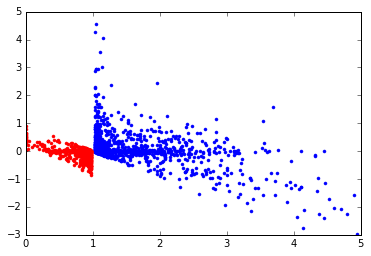

In [15]:
#Looking at deviations in fitted s for regions of 1/x line
plt.plot(x2['s_fitted'],(((1.0/x2['s_true'])-x2['s_fitted']) ), 'b.')#(1.0/x2['s_true'])-x2['s_fitted']) - np.median
plt.plot(x3['s_fitted'],(((1.0/x3['s_true'])-x3['s_fitted']) ), 'r.')
#plt.yscale('log')

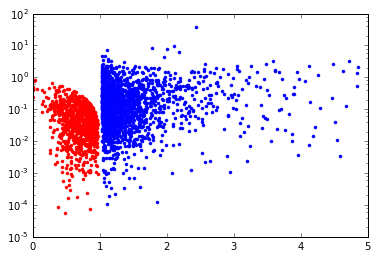

In [16]:
# Looking at deviations in fitted s for regions excluding the 1/x line
plt.plot(x1['s_fitted'],(((x1['s_true'])-x1['s_fitted']) ), 'b.')#(1.0/x2['s_true'])-x2['s_fitted']) - np.median
plt.plot(x4['s_fitted'],(((x4['s_true'])-x4['s_fitted']) ), 'r.')
plt.yscale('log')

# Looking at weighted MADs

In [17]:
x_i = df['s_fitted']-df['s_true']

In [18]:
G = 6.67e-11
m_sun = 1.989e30
kpc = 3.086e19
c = 2.99e8
const = 4*(G*m_sun)/(kpc*(c**2))
d_rel = (df['D_l']*df['D_s'])/(df['D_s']-df['D_l'])
df['theta_E'] = np.sqrt(df['m_l']*const / d_rel)

In [19]:
df['weight'] = np.sqrt((df['mu_s_b']-df['mu_l_b'])**2 + (df['mu_s_l']-df['mu_l_l'])**2)*df['theta_E']

In [20]:
print min(np.abs(x_i - np.median(x_i)))
print max(np.abs(x_i - np.median(x_i)))

4.100469750001334e-05
38.505037865967495


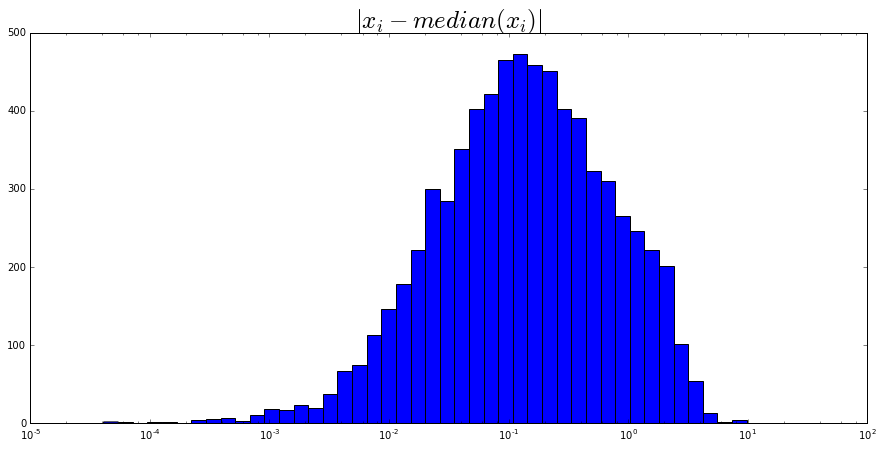

In [21]:
plt.hist(np.abs(x_i - np.median(x_i)),bins=np.logspace(np.log10(4.1e-05),np.log10(40),50))
plt.xscale('log')

plt.title('$|x_i - median(x_i)|$',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)

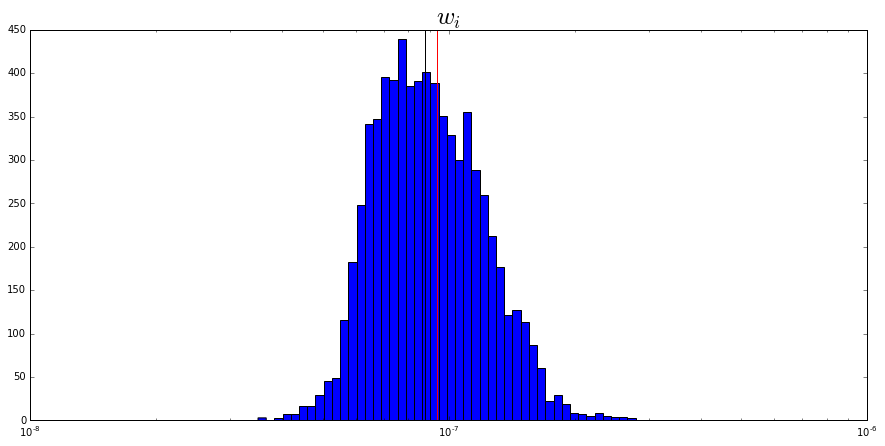

In [22]:
plt.hist(df['weight'],bins=np.logspace(np.log10(3.5e-08),np.log10(3.2e-07),50))
plt.xscale('log')
plt.title('$w_i$',size=25)
plt.axvline(x=np.median(df['weight']),color='k')
plt.axvline(x=np.mean(df['weight']),color='r')


f = plt.gcf()
f.set_size_inches(15.0,7)

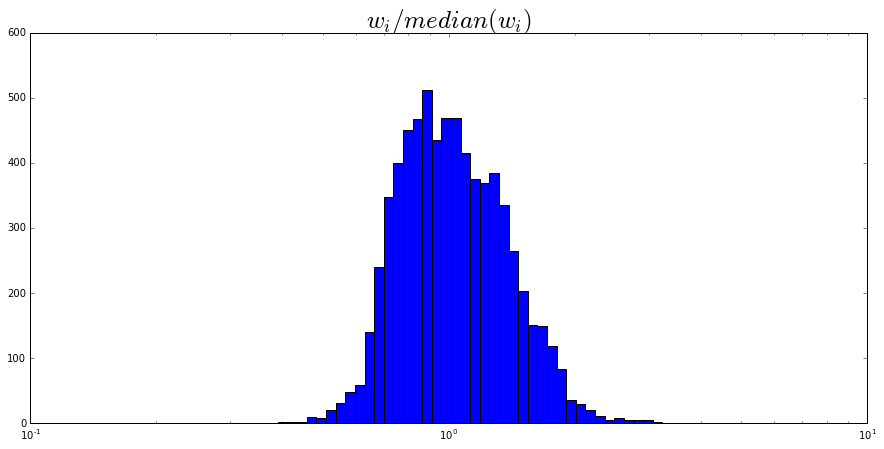

In [23]:
plt.hist((df['weight']/np.median(df['weight'])),bins=np.logspace(np.log10(0.3),np.log10(4),50))
plt.xscale('log')
plt.title('$w_i / median(w_i) $',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)

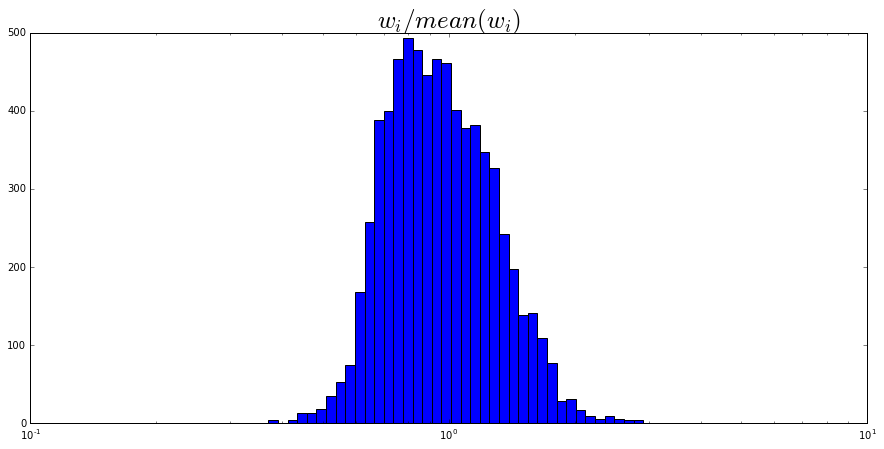

In [24]:
plt.hist((df['weight']/np.mean(df['weight'])),bins=np.logspace(np.log10(0.3),np.log10(4),50))
plt.xscale('log')
plt.title('$w_i / mean(w_i) $',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)

In [25]:
max(df['weight']*np.abs(x_i - np.median(x_i)))

2.1163352371116925e-06

In [26]:
min(df['weight']*np.abs(x_i - np.median(x_i)))

3.2289140348675e-12

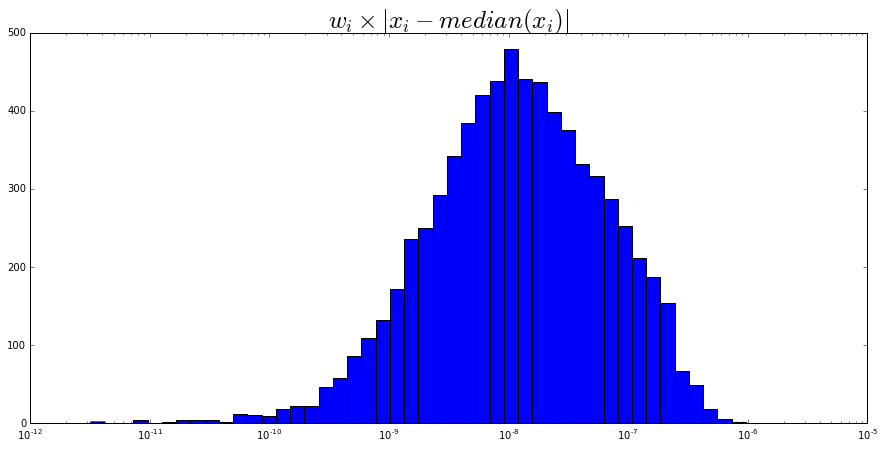

In [27]:
plt.hist(df['weight']*np.abs(x_i - np.median(x_i)),bins=np.logspace(np.log10(3.2e-12),np.log10(2.2e-06),50))
plt.xscale('log')
plt.title(r'$w_i \times |x_i - median(x_i)|$',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)



In [28]:
max((df['weight']*np.abs(x_i - np.median(x_i)))/np.sum(df['weight']))

0.003174663236932864

In [29]:
min((df['weight']*np.abs(x_i - np.median(x_i)))/np.sum(df['weight']))

4.843615747616745e-09

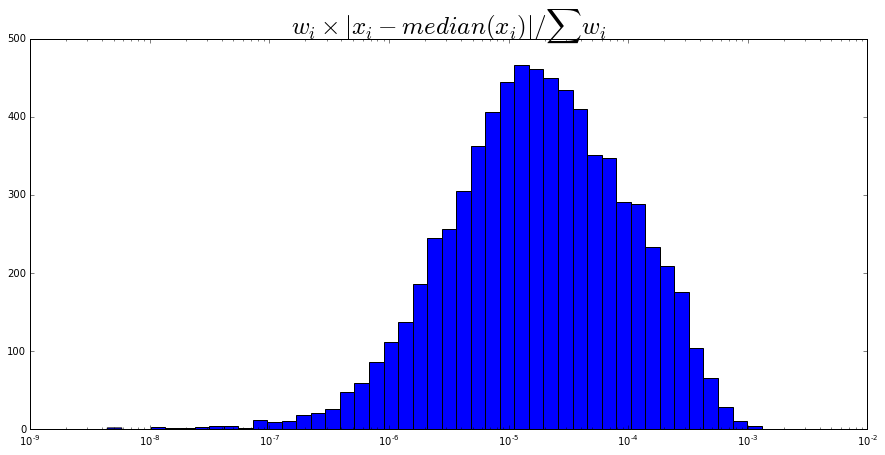

In [30]:
plt.hist((df['weight']*np.abs(x_i - np.median(x_i)))/np.sum(df['weight']),bins=np.logspace(np.log10(4.4e-9),np.log10(0.004),50))
plt.xscale('log')
plt.title(r'$w_i \times  |x_i - median(x_i)|/{\sum w_i}$',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)

In [31]:
max((df['weight']*np.abs(x_i - np.mean(x_i)))/np.sum(df['weight']))

0.003177369922727713

In [32]:
min((df['weight']*np.abs(x_i - np.mean(x_i)))/np.sum(df['weight']))

7.159881449912576e-10

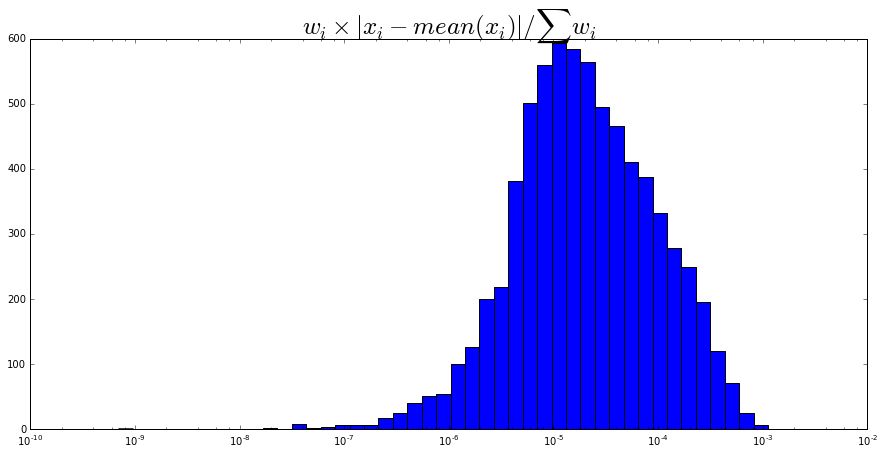

In [33]:
plt.hist((df['weight']*np.abs(x_i - np.mean(x_i)))/np.sum(df['weight']),bins=np.logspace(np.log10(7e-10),np.log10(0.004),50))
plt.xscale('log')
plt.title(r'${w_i \times|x_i - mean(x_i)|}/{\sum w_i}$',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)

In [34]:
np.median((df['weight']*np.abs(x_i - np.median(x_i)))/np.sum(df['weight']))

1.7893406392772854e-05

In [35]:
np.mean((df['weight']*np.abs(x_i - np.mean(x_i)))/np.sum(df['weight']))

5.757586918898811e-05

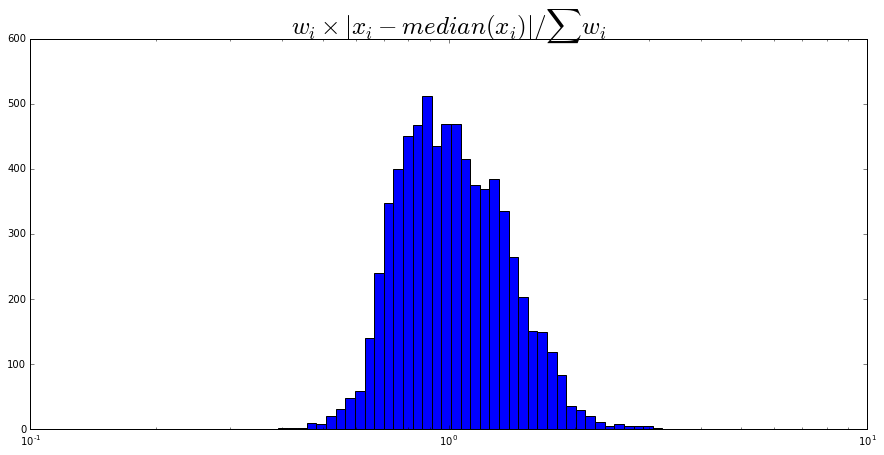

In [36]:
plt.hist((df['weight']/np.median(df['weight'])),bins=np.logspace(np.log10(0.3),np.log10(4),50))
plt.xscale('log')
plt.title(r'${w_i \times|x_i - median(x_i)|}/{\sum w_i}$',size=25)

f = plt.gcf()
f.set_size_inches(15.0,7)

In [37]:
len(df)

7108

In [38]:
np.sum(df['weight']/max(df['weight']))

2132.1093827352447

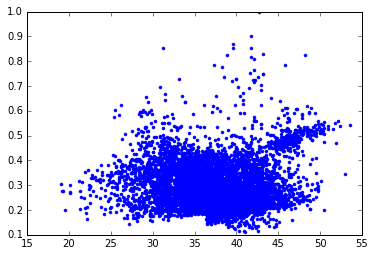

In [39]:
plt.plot(np.sqrt((df['mu_s_b']-df['mu_l_b'])**2 + (df['mu_s_l']-df['mu_l_l'])**2),df['weight']/max(df['weight']),'b.')

In [74]:
df['tE_ratio'] = np.abs(df['tEp_fitted']/df['tE_fitted'])**2
df['q_true_new'] = df['q_true'] + (df['rho']**2)

In [41]:
df_sort = df
df_sort['sorted_dif_s'] = np.abs(df['s_fitted_log']-df['s_true_log'])
df_sort['sorted_dif_tEp'] = np.abs(np.log10(df['tE_ratio'])-np.log10(df['q_true_new']))

In [42]:
df_sort_s = df_sort.sort(['sorted_dif_s']).reset_index()
df_sort_q = df_sort.sort(['sorted_dif_tEp']).reset_index()


#[(df_sort['s_true']>0.9) & (df_sort['s_true']<1.1)]

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [43]:
x_s = df_sort_s['weight']
x_q = df_sort_q['weight']


MAD_1_s = np.zeros(len(x_s))
MAD_2_s = np.zeros(len(x_s))
MAD_3_s = np.zeros(len(x_s))
MAD_1_q = np.zeros(len(x_q))
MAD_2_q = np.zeros(len(x_q))
MAD_3_q = np.zeros(len(x_q))

for i in range(len(df_sort['weight'])):
    MAD_1_s[i] = np.abs((np.sum(x_s[0:i])/np.sum(x_s))-0.5)
    MAD_2_s[i] = ((np.sum(x_s[0:i])/np.sum(x_s))-0.5)
    MAD_3_s[i] = ((np.sum(x_s[0:i])/np.sum(x_s)))
    MAD_1_q[i] = np.abs((np.sum(x_q[0:i])/np.sum(x_q))-0.5)
    MAD_2_q[i] = ((np.sum(x_q[0:i])/np.sum(x_q))-0.5)
    MAD_3_q[i] = ((np.sum(x_q[0:i])/np.sum(x_q)))

In [44]:
y1 = df_sort_s['sorted_dif_s']
y2 = df_sort_q['sorted_dif_tEp']

In [45]:
len(MAD_1_s)

7108

In [46]:
y1[argmin(MAD_1_s)]


0.05407557178080001

In [47]:
y2[argmin(MAD_1_q)]

0.5832135863423624

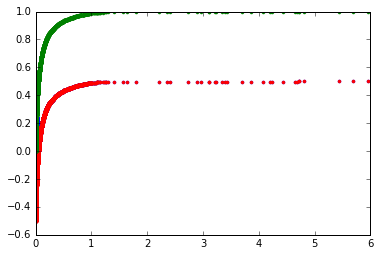

In [234]:
plt.plot(df_sort_s['sorted_dif_s'], MAD_1_s,'b.')
plt.plot(df_sort_s['sorted_dif_s'], MAD_2_s,'r.')
plt.plot(df_sort_s['sorted_dif_s'], MAD_3_s,'g.')
#plt.xlim(0,0.2)

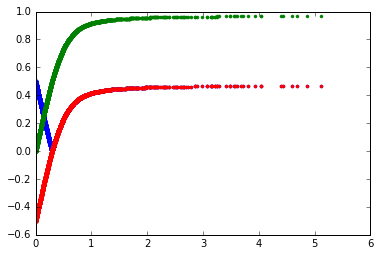

In [160]:
plt.plot(df_sort_q['sorted_dif_tEp'], MAD_1_q,'b.')
plt.plot(df_sort_q['sorted_dif_tEp'], MAD_2_q,'r.')
plt.plot(df_sort_q['sorted_dif_tEp'], MAD_3_q,'g.')
#plt.xlim(0,0.2)

In [72]:
med_med(df['s_true_log']-df['s_fitted_log'])

0.04999943464132001

In [75]:
med_med(np.log10(df['tE_ratio'])-np.log10(df['q_true_new']))

0.5695607330522479

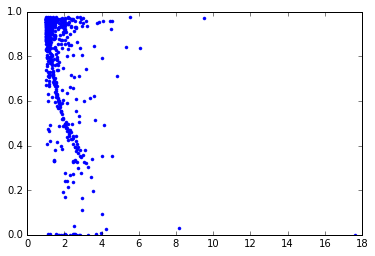

In [13]:
plt.plot(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)],df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)],'b.')

In [20]:
ff =df[(df['s_true']<1)&(df['s_fitted']>1)]

In [21]:
len(ff[((1.0/df['s_fitted'])>df['s_true']-0.05) &((1.0/df['s_fitted'])<df['s_true']+0.05)])

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


488

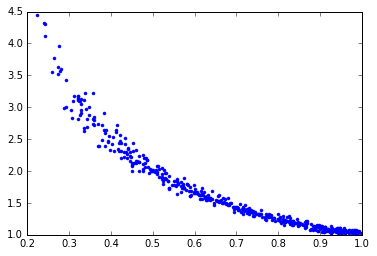

In [22]:
plt.plot(ff['s_true'][((1.0/df['s_fitted'])>df['s_true']-0.05) &((1.0/df['s_fitted'])<df['s_true']+0.05)],
         ff['s_fitted'][((1.0/df['s_fitted'])>df['s_true']-0.05) &((1.0/df['s_fitted'])<df['s_true']+0.05)],'b.')

In [23]:
ff[['name','s_true','s_fitted']][((1.0/df['s_fitted'])>df['s_true']-0.05) &((1.0/df['s_fitted'])<df['s_true']+0.05)][ff['s_true']<0.7]

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,name,s_true,s_fitted
4,cassan_0_109_2397.det.lc.gz,0.683782,1.496885
45,cassan_0_30_255.det.lc.gz,0.274684,3.636956
126,cassan_0_87_3319.det.lc.gz,0.537494,1.845862
155,cassan_10_112_3168.det.lc.gz,0.328106,2.904737
203,cassan_10_43_465.det.lc.gz,0.558755,1.843154
303,cassan_11_126_1453.det.lc.gz,0.641289,1.687309
331,cassan_11_23_2833.det.lc.gz,0.485389,2.168031
341,cassan_11_31_96.det.lc.gz,0.692199,1.441754
351,cassan_11_36_1378.det.lc.gz,0.482560,2.069063
397,cassan_11_74_2082.det.lc.gz,0.682818,1.473162


In [29]:
df_org[['name','s_true','s_fitted','u0_true','tE_true']][((red_chi_2_1-red_chi_2_2)<10)][df_org['u0_true']>0.3]

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,name,s_true,s_fitted,u0_true,tE_true
3911,cassan_0_24_3180.det.lc.gz,2.676270,8.069110,2.252670,43.43670
3997,cassan_10_112_107.det.lc.gz,0.321046,0.156537,2.249300,41.92060
4003,cassan_10_125_641.det.lc.gz,0.473747,9.619587,1.498290,15.48550
4012,cassan_10_138_746.det.lc.gz,2.937400,5.338336,1.808160,87.13640
4014,cassan_10_150_1550.det.lc.gz,4.561850,0.058409,1.269000,17.69290
4025,cassan_10_31_1076.det.lc.gz,0.379592,0.034686,2.198120,11.96570
4041,cassan_10_46_567.det.lc.gz,1.373120,114.301255,0.654623,10.68870
4063,cassan_10_72_2091.det.lc.gz,0.538609,13.331760,1.315230,32.12070
4089,cassan_10_99_632.det.lc.gz,3.735760,0.054087,2.596050,17.78740
4094,cassan_11_101_479.det.lc.gz,3.151920,0.009065,2.265360,13.73380
